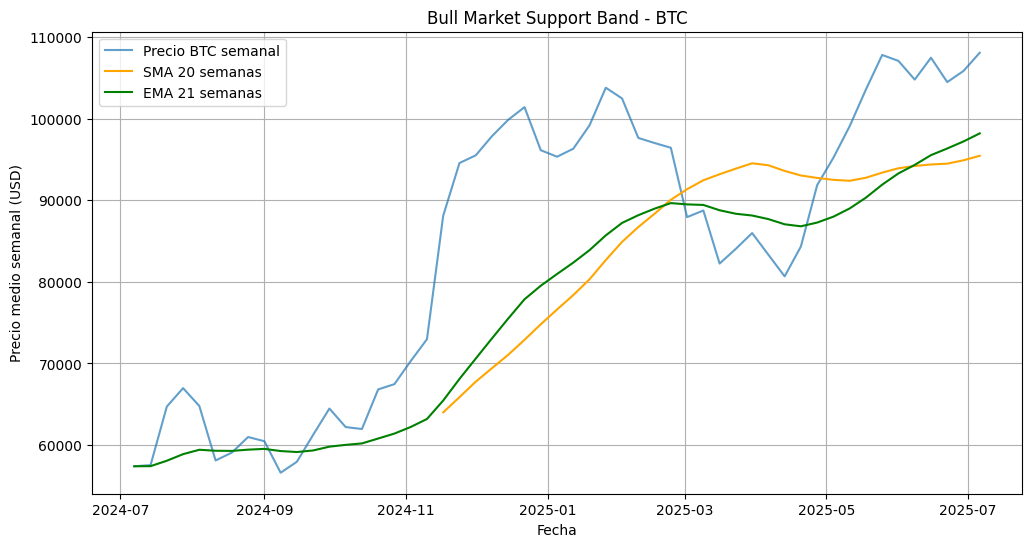

In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos (2 años = ~104 semanas)
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart'
params = {'vs_currency': 'usd', 'days': '365'}
response = requests.get(url, params=params).json()

# Convertir a DataFrame
prices = pd.DataFrame(response['prices'], columns=['timestamp', 'price'])
prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')

# Agrupar por semana
prices.set_index('timestamp', inplace=True)
weekly = prices['price'].resample('W').mean().reset_index()

# Calcular BMSB
weekly['SMA_20'] = weekly['price'].rolling(window=20).mean()
weekly['EMA_21'] = weekly['price'].ewm(span=21, adjust=False).mean()

# Plot 
plt.figure(figsize=(12,6))
plt.plot(weekly['timestamp'], weekly['price'], label='Precio BTC semanal', alpha=0.7)
plt.plot(weekly['timestamp'], weekly['SMA_20'], label='SMA 20 semanas', color='orange')
plt.plot(weekly['timestamp'], weekly['EMA_21'], label='EMA 21 semanas', color='green')

plt.title('Bull Market Support Band - BTC')

plt.xlabel('Fecha')
plt.ylabel('Precio medio semanal (USD)')

plt.legend()
plt.grid(True)
plt.show()